In [32]:
#import chunk 
import pandas as pd
from geopy.geocoders import Nominatim
import plotly.express as px

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np


from mpl_toolkits.mplot3d import Axes3D


In [33]:
#reading in the dataset
df_all = pd.read_csv("NFWBS_PUF_2016_data.csv", index_col="PUF_ID")
df_all = df_all.sample(n=400)
df_all

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
8263,1,2,5,5,5,49,3,3,3,3,...,1,1,2,0,0,1,0,2,1,3.109466
13980,1,3,7,7,7,53,3,3,3,2,...,1,4,8,0,0,1,1,2,0,1.296501
10167,1,3,4,5,5,53,3,3,2,3,...,1,4,9,0,0,0,0,2,1,0.456403
12693,2,3,7,7,7,51,3,3,1,3,...,1,2,3,0,0,0,0,2,0,0.653542
11828,3,2,5,5,4,55,2,2,2,2,...,1,4,9,0,0,0,0,3,-5,0.621051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,1,2,6,6,7,65,3,3,1,4,...,1,1,2,0,0,0,0,2,0,0.806766
7961,1,3,7,7,7,72,5,5,2,5,...,1,3,5,0,0,1,0,2,0,1.840624
11226,2,2,6,7,6,77,4,4,1,4,...,0,1,2,0,0,0,0,2,0,1.070734


In [34]:
#did this to look at the column names 
for col in df_all.columns:
    print(col)

sample
fpl
SWB_1
SWB_2
SWB_3
FWBscore
FWB1_1
FWB1_2
FWB1_3
FWB1_4
FWB1_5
FWB1_6
FWB2_1
FWB2_2
FWB2_3
FWB2_4
FSscore
FS1_1
FS1_2
FS1_3
FS1_4
FS1_5
FS1_6
FS1_7
FS2_1
FS2_2
FS2_3
SUBKNOWL1
ACT1_1
ACT1_2
FINGOALS
PROPPLAN_1
PROPPLAN_2
PROPPLAN_3
PROPPLAN_4
MANAGE1_1
MANAGE1_2
MANAGE1_3
MANAGE1_4
SAVEHABIT
FRUGALITY
AUTOMATED_1
AUTOMATED_2
ASK1_1
ASK1_2
SUBNUMERACY2
SUBNUMERACY1
CHANGEABLE
GOALCONF
LMscore
FINKNOWL1
FINKNOWL2
FINKNOWL3
FK1correct
FK2correct
FK3correct
KHscore
KHKNOWL1
KHKNOWL2
KHKNOWL3
KHKNOWL4
KHKNOWL5
KHKNOWL6
KHKNOWL7
KHKNOWL8
KHKNOWL9
KH1correct
KH2correct
KH3correct
KH4correct
KH5correct
KH6correct
KH7correct
KH8correct
KH9correct
ENDSMEET
HOUSING
LIVINGARRANGEMENT
HOUSERANGES
IMPUTATION_FLAG
VALUERANGES
MORTGAGE
SAVINGSRANGES
PRODHAVE_1
PRODHAVE_2
PRODHAVE_3
PRODHAVE_4
PRODHAVE_5
PRODHAVE_6
PRODHAVE_7
PRODHAVE_8
PRODHAVE_9
PRODUSE_1
PRODUSE_2
PRODUSE_3
PRODUSE_4
PRODUSE_5
PRODUSE_6
CONSPROTECT1
CONSPROTECT2
CONSPROTECT3
EARNERS
VOLATILITY
SNAP
MATHARDSHIP_1
MATHARDSHI

[Text(0.5, 1.0, 'Poverty Level vs. Satisfaction with Life')]

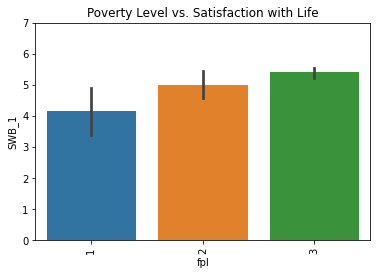

In [35]:
#data visualization for poverty level and satisfaction with life to see the relationship between the two

plot = sns.barplot(data = df_all, x = "fpl", y = "SWB_1" )

plot.ticklabel_format(style = "plain" , axis = 'y')

plt.ylim(0,7)
plot.tick_params(labelrotation = 90 , axis = 'x')
plot.set(title =  "Poverty Level vs. Satisfaction with Life" )

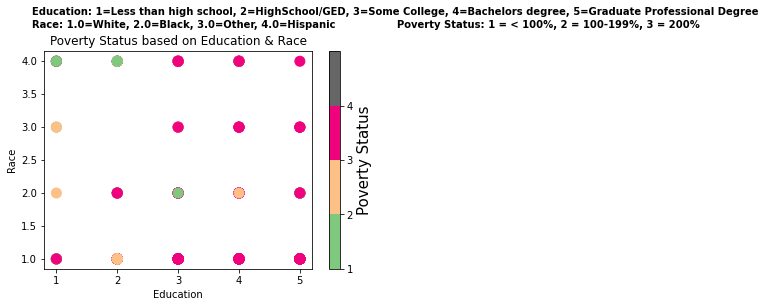

In [36]:
#data visualization for poverty status based on education and race
x = df_all["PPEDUC"]
y = df_all["PPETHM"]
colors = df_all["fpl"]


plt.scatter(x,y, c=colors, s=100, cmap=plt.cm.get_cmap('Accent', 4))
cbar = plt.colorbar()
cbar.set_label(label="Poverty Status", size=15)
cbar.set_ticks([1, 2, 3, 4])
plt.clim(1,5)
plt.xlabel('Education')
plt.ylabel('Race')
plt.title('Poverty Status based on Education & Race')
plt.text(0.6, 4.7, "Education: 1=Less than high school, 2=HighSchool/GED, 3=Some College, 4=Bachelors degree, 5=Graduate Professional Degree", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.6, 4.5, "Race: 1.0=White, 2.0=Black, 3.0=Other, 4.0=Hispanic", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(6.6, 4.5, "Poverty Status: 1 = < 100%, 2 = 100-199%, 3 = 200%", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()



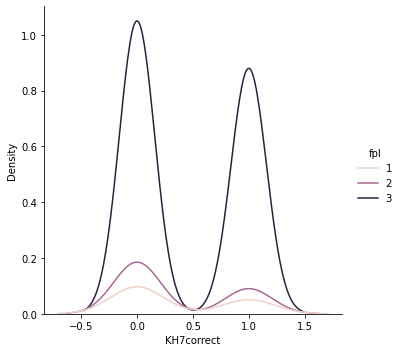

In [37]:
#this is the density curve visualization which investigates the relationship between the people that got the question correct regarding credit card minimum payments and poverty status

plot = sns.displot(data = df_all, x="KH7correct", kind="kde" , hue = "fpl")

[Text(0.5, 1.0, 'Generation vs. Life Expectancy by poverty rate')]

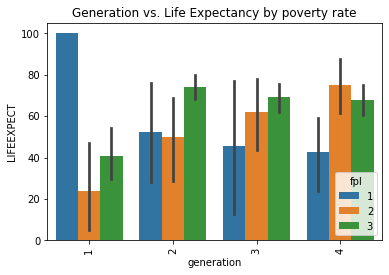

In [38]:
#data visualization and barplot to see the relationship between Generation , Life Expectancy by poverty rate
plot = sns.barplot(data = df_all, x="generation", y="LIFEEXPECT" , hue= "fpl")

plot.tick_params(labelrotation = 90 , axis = 'x')
plot.set(title =  "Generation vs. Life Expectancy by poverty rate" )

In [25]:
#clustering poverty rate, Satification with life, and Education
clust_columns1 = ["fpl" , "SWB_1","PPEDUC"]

#number of clusters 
num_clusts1 = 3

#How we want to calculate the interclustering 
linkage_type = "average"



#Selecting clustering columns
df_cluster1 = df_all[clust_columns].dropna()




# Scale the data and cluster
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(df_cluster1)
agglom1 = AgglomerativeClustering(n_clusters=num_clusts1, linkage=linkage_type).fit(scaled_data1)
df_cluster1["label"] = agglom1.labels_

In [26]:
#print out clusters for poverty rate, Satification with life, and Education
cluster_towns = {}
for index, row in df_cluster.reset_index().iterrows():
    clust = row["label"]
    cluster_towns.setdefault(clust, []).append(row)
    
for cluster, rows in cluster_towns.items():
    rows_tuples = [ tuple(row) for row in rows ]
    for row in sorted(rows_tuples):
        print(row[:7])
    print("\n")

(7153, 3, 1, 4, 0)
(7176, 3, 1, 5, 0)
(7223, 2, 2, 1, 0)
(7248, 3, 2, 5, 0)
(7278, 1, 1, 2, 0)
(7282, 1, 2, 1, 0)
(7290, 3, 1, 2, 0)
(7302, 2, 1, 1, 0)
(7351, 3, 1, 3, 0)
(7372, 3, 1, 2, 0)
(7394, 3, 1, 5, 0)
(7431, 3, 1, 4, 0)
(7803, 1, 2, 2, 0)
(7817, 3, 2, 5, 0)
(7853, 3, 2, 3, 0)
(7866, 3, 1, 2, 0)
(7885, 2, 1, 2, 0)
(7892, 3, 1, 3, 0)
(7909, 3, 1, 5, 0)
(7943, 3, 1, 5, 0)
(8003, 2, 1, 4, 0)
(8018, 3, 1, 4, 0)
(8023, 3, 1, 3, 0)
(8031, 3, 1, 5, 0)
(8043, 3, 1, 5, 0)
(8051, 3, 1, 1, 0)
(8052, 3, 1, 4, 0)
(8074, 3, 1, 2, 0)
(8078, 3, 1, 3, 0)
(8087, 3, 1, 2, 0)
(8102, 2, 1, 3, 0)
(8106, 3, 1, 3, 0)
(8125, 3, 1, 4, 0)
(8138, 3, 1, 2, 0)
(8145, 3, 1, 3, 0)
(8263, 2, 2, 2, 0)
(8286, 3, 2, 3, 0)
(8315, 3, 1, 3, 0)
(8337, 3, 1, 5, 0)
(8363, 3, 1, 3, 0)
(8376, 3, 1, 3, 0)
(8403, 3, 1, 4, 0)
(8404, 2, 1, 2, 0)
(8419, 3, 1, 3, 0)
(8429, 3, 1, 5, 0)
(8451, 3, 1, 2, 0)
(8457, 3, 1, 3, 0)
(8478, 2, 1, 4, 0)
(8491, 1, 1, 1, 0)
(8495, 3, 1, 4, 0)
(8524, 3, 1, 5, 0)
(8546, 3, 2, 2, 0)
(8552, 2, 1,

In [27]:
#clustering the varibles for poverty rate, ethnicity, education


clust_columns = ["fpl" , "PPETHM","PPEDUC"]

#number of clusters 
num_clusts = 3

#How we want to calculate the interclustering 
linkage_type = "average"



#Selecting clustering columns
df_cluster = df_all[clust_columns].dropna()




# Scale the data and cluster
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
agglom = AgglomerativeClustering(n_clusters=num_clusts, linkage=linkage_type).fit(scaled_data)
df_cluster["label"] = agglom.labels_




In [28]:
#print out clusters for poverty rate, ethnicity, education
cluster_towns = {}
for index, row in df_cluster.reset_index().iterrows():
    clust = row["label"]
    cluster_towns.setdefault(clust, []).append(row)
    
for cluster, rows in cluster_towns.items():
    rows_tuples = [ tuple(row) for row in rows ]
    for row in sorted(rows_tuples):
        print(row[:7])
    print("\n")

(7153, 3, 1, 4, 0)
(7176, 3, 1, 5, 0)
(7223, 2, 2, 1, 0)
(7248, 3, 2, 5, 0)
(7278, 1, 1, 2, 0)
(7282, 1, 2, 1, 0)
(7290, 3, 1, 2, 0)
(7302, 2, 1, 1, 0)
(7351, 3, 1, 3, 0)
(7372, 3, 1, 2, 0)
(7394, 3, 1, 5, 0)
(7431, 3, 1, 4, 0)
(7803, 1, 2, 2, 0)
(7817, 3, 2, 5, 0)
(7853, 3, 2, 3, 0)
(7866, 3, 1, 2, 0)
(7885, 2, 1, 2, 0)
(7892, 3, 1, 3, 0)
(7909, 3, 1, 5, 0)
(7943, 3, 1, 5, 0)
(8003, 2, 1, 4, 0)
(8018, 3, 1, 4, 0)
(8023, 3, 1, 3, 0)
(8031, 3, 1, 5, 0)
(8043, 3, 1, 5, 0)
(8051, 3, 1, 1, 0)
(8052, 3, 1, 4, 0)
(8074, 3, 1, 2, 0)
(8078, 3, 1, 3, 0)
(8087, 3, 1, 2, 0)
(8102, 2, 1, 3, 0)
(8106, 3, 1, 3, 0)
(8125, 3, 1, 4, 0)
(8138, 3, 1, 2, 0)
(8145, 3, 1, 3, 0)
(8263, 2, 2, 2, 0)
(8286, 3, 2, 3, 0)
(8315, 3, 1, 3, 0)
(8337, 3, 1, 5, 0)
(8363, 3, 1, 3, 0)
(8376, 3, 1, 3, 0)
(8403, 3, 1, 4, 0)
(8404, 2, 1, 2, 0)
(8419, 3, 1, 3, 0)
(8429, 3, 1, 5, 0)
(8451, 3, 1, 2, 0)
(8457, 3, 1, 3, 0)
(8478, 2, 1, 4, 0)
(8491, 1, 1, 1, 0)
(8495, 3, 1, 4, 0)
(8524, 3, 1, 5, 0)
(8546, 3, 2, 2, 0)
(8552, 2, 1,

In [29]:
#here we are classifying on poverty rate on a 80% and 20% testing and training split to furhter investigate the poverty rate classification
x = df_all.drop(columns = "class_label")

xtrain, xtest, ytrain, ytest = train_test_split(x, df_all["class_label"], test_size = .2)


ytest


PUF_ID
11869    3
10468    3
12400    3
11134    3
9128     3
        ..
8043     3
7372     3
14254    3
12619    3
13911    3
Name: class_label, Length: 80, dtype: int64

In [30]:
#testing accuracy of the model 
kneigh = KNeighborsClassifier(n_neighbors=3)
clf = kneigh.fit(xtrain, ytrain) # Fix this!
clf
pred = clf.predict(xtest)
acc= metrics.accuracy_score(ytest, pred)
print(acc)

0.7375


In [31]:
#fitting the model
scores = cross_val_score(
    clf, x, df_all["class_label"], cv=5, scoring='f1_macro')

print(scores)


[0.38992409 0.41476181 0.39181287 0.3816526  0.40996872]
